# <div style="text-align:center"> DS7333 - Case Study 15 | QTW Final Project</div>
### <div style="text-align:center">Andy Ho, An Nguyen, Jodi Pafford</div>
<div style="text-align:center">August 12, 2019</div>

## Introduction
This report will provide our methods, model, analysis, and conclusions for the unlabeled data set provided.  Along with that, the data cleaning process will be explained and details on our findings provided.  <br><br>
To recap, we were assigned a dataset with 160,000 records and 51 features.  According to our business partner, the data is related to the insurance industry.  For the most part, the features were unlabeled – meaning the data has not been tagged identifying its characteristics, properties, or classifications.  However, the target variable (i.e. dependent variable) is labeled (0 or 1).  As a result, we will be looking at various supervised machine learning methods to arrive at our conclusions. <br><br>
For general background, supervised machine learning (SML) learns from the dataset to for classification and/or regression purposes.  In this report, we will use the following methods for classification:
- Logistic Regression
- Decision Tree
- Random Forest
- Support Vector Machine
- K- Nearest Neighbor

The objective given by our business partner is to arrive at a model that best classifies the ‘y’ values (0 or 1).  Hence, this is a classification problem and our conclusions will report the model with the best accuracy in classifying records/observations.  <br><br>
What does classification mean?  At its core, classification learns from the data given (i.e. training dataset) and then uses the findings to create a model to accurately classify new records.  Along with accuracy, we will show the ratio of actual values to predicted values.  As advised by our business partner, it is important to the business to accurately classify but even more so to lower the amount of ‘False Positives’ – mis-classifying a false positive could cost the business a thousand dollars while mis-classifying a false negative cost hundred dollars.  Therefore, our objective is to arrive at the highest accuracy score with the lowest false positve ratio.  Below is a graphic to help explain the possible outcomes:
![alt text](classification_outcomes.png "Classification Outcomes")

## Summary
Our recommendation is using K-NN (k=9) with feature selection to best classify for this data set.  Based on receiving new data with these same categories, the business will be able to predict/classify with approximately a 95.17% accuracy whether the transaction will result in money lost (0) or gained (1). Out of the 5% error rate in prediction, 3.74% were false positive results and 6.45% were false negative results.<br><br>
The remainder of the report will provide further details on our process of data cleaning, feature selection/engineering, methods, modeling, and analysis.  
## Our Process
The objective is to suggest/recommend Machine Learning models that would most accurately classify (with the lowest 'False Positives') the outcome ‘y.’   Our process was as follows:

1.	Clean Data
2.	Feature Select
3.	Model
4.	Analyze
5.	Evaluate


## Clean Data
The raw data set was unlabeled.  It contained a total of 160,000 records and 51 features.  Using a Python library called ‘Pandas_Profiling’, we uncovered the following:
1.	Datatypes <br>
    a.	Numeric: 45<br>
    b.	Categorical: 5<br>
    c.	Boolean: 1<br>
2.	High Correlation<br>
    a.	x41 – Dropped x41 from dataset<br>
    b.	x6 – Dropped x6 from dataset<br>
3.	High Cardinality<br>
    a.	x37 – The values had incorrect datatype – causing an incorrect assesessment of high cardinality.  To clean it, we removed the commas and dollar sign, and replaced the parenthesis with a minus symbol.  Converted datatype to numeric.<br>
4.	Data augmentation<br>
    a.	Misspellings were present in x24.  Corrected ‘euorpe’ to ‘europe’<br>
    b.	Standardize values<br>
        1.	x29 – Replaced all month abbreviations to full spelling (i.e. Aug to August)<br>
        2.	x30 – Corrected misspelling of ‘thurday’ to ‘thursday’<br>
5.	Missing values, NaN:<br>
    a.	There are 20-40 missing values in each column.<br>
    b.	Most of the missing values appears to be from Asia.  It was decided that these data can be replaced with the mean of the available data from Asia.<br>
    c.	The observations with missing values in the column with different continent names were dropped.<br>
6.	Data Distribution was normal.  No data transformation was required.<br>


## Feature Select
This portion took a bulk of our time.  The process of feature selection was a continuous cycle between ‘feature select’ and ‘modeling.’  The first pass was to use the complete dataset with each subsequent iteration removing features and/or records.<br><br>
	We attempted to reduce the number of features required through PCA.  We found that 8 principal components can explain for 99.9% of the variance.<br><br>
Because this was a classification assignment, we selected a few classification models to find the best model for the data set (refer to ‘Model’ section for more details).  In the end, we decided that all the categorical features made little to no impact on the accuracy scores – therefore, dropped.<br><br>
**Random Forest Feature Importance (RFFI)**<br>
Knowing feature importance allowed us to better understand the data set and provided insights to our feature selection process.  After removing the categorical features, we ran RFFI for the remaining 45 features (using all 160,000 records) to arrive at the following feature of importance (>0.04):<br>
- x23
- x20
- x48
- x49
- x38
- x12
- x42
- x27
- x40
- x37
- x28
- x7
- x2
- x46

## Modeling of Methods
We started to evaluate the SML methods stated above from the most common/basic to more complex.  Each method selected utilized two versions of the data set to arrive at the method that yielded the best model (i.e. most accurate). The following will provide further detail into our process in sequential order of evaluation:<br><br>
**Logistic Regression (LR)**<br>
This method was the most obvious to run first since the dependent variable (‘y) was binary (0 or 1). The objective is to describe data and to explain the relationship between the dependent variable to the rest of the data set. Unfortunately, LR yielded the lowest accuracy rates in predicting the classification.
- Full Data Set: 70.27%
- Feature Selected: 70.33%

**Decision Tree (DT)**<br>
The goal of DT is to split the observations in a way that the resulting groups are as different from each other as much as possible.  The structure of a tree is the root node, internal node, and leaf nodes – all of which are connected by branches.  DT is the building block for Random Forest.  The DT yielded better accuracy results compared to LR. XGBoost is a gradient boost to decision tree designed for speed and performance.
- Full Data: 84.09% accuracy using entropy
- Feature Selected: 86.5% accuracy using entropy criterion.
- XGBoosted on Feature Selected: 83.12%

**Random Forest(RF)**<br>
RF uses a large number of uncorrelated decision trees to operate as a committee – much like an ensemble.  Each DT outputs a class prediction and the class with the most votes is the RF’s optimal model prediction.  The RF yielded better accuracy results compared to both LR and DT.
- Full Data: 88.7% accuracy
- Feature Selected: 91.5% accuracy

**Support Vector Machine (SVM)**<br>
**AN ADD INFO HERE**

**Principal Component Analysis (PCA)**<br>
**AN ADD INFO HERE**

**k-Nearest Neighbor (KNN)**<br>
KNN is a non-parametric, lazy learning machine learning algorithm with the purpose to predict the classification of data. Non-parametric means that no assumptions are made about the data before classifying; lazy learning means that there is no training phase before classifying. KNN often has the ‘dimensionality curse’, where a dataset with many variables is not as accurate; however, because our dataset is so large, we reduce the dimensionality curse. KNN is our ‘winning’ algorithm (see Analysis section for more details on the process). Other methods tried with KNN were adjusting the test size, one-hot-encoding all categorical variables, and using 
- Full Data: 80.24% accuracy
- Feature Selected: 95.17% accuracy

## Analysis
With KNN, we started with the full dataset and k=5. After yielding somewhat high results on the first pass at the full dataset, we ran a KNN loop (with just the feature selected data) from k=1=k=25. Results can be seen below:<br><br>
![alt text](KNN_Accuracy.png "KNN Accuracy Chart")
The best accuracy was found at k=9, although not much variation occurred between k=5 and k=9. After k=9 the accuracy slowly dropped. Upon running KNN with the featured dataset, with a test size of 20% (32,000 samples), and a random_state set at “1234”, we found the accuracy to be 95.17%.<br>
![alt text](KNN_Matrix.png "KNN Confusion Matrix")

## Results
KNN had an accuracy of 95.17%. Within those results, a positive was correctly predicted 96.26% of the time, and a negative was correctly predicted 93.55% of the time. Incorrect classifications of positive results occurred 3.74% of the time, while incorrect classifications of negative results occurred 6.45% of the time.<br>

## Conclusions
You can expect to correctly predict a positive (y=1) outcome 96.17% of the time and correctly predict a negative (y=0) outcome 93.55% of the time. <br>
Further investigations can be done by analyzing the data with the categorical variables (continents, month, day). These datapoints did not prove significant in our findings, however, they may be important to the business partner.

# Appendix

In [1]:
import tkinter
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pandas_profiling as pp
import re

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.externals.six import StringIO 
from sklearn.decomposition import PCA
from sklearn.svm import SVC

from IPython.display import Image 
from pydot import graph_from_dot_data

from mlxtend.plotting import plot_confusion_matrix
import random
import seaborn as sns
%matplotlib inline

C:\Users\jodip\Anaconda3\envs\QTWFinal\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


## Load and Clean Data

In [2]:
# Read in CSV
df = pd.read_csv("final_project.csv")
print(len(df))

160000


In [3]:
# Rename obvious columns
df.rename(columns={'x24': 'continent', 'x29': 'month', 'x30': 'day'}, inplace = True)
#list(df.columns) 

In [4]:
# initialize temp for x37 column
temp_x37 = []

# Remove $ ) , characters and replace '(' with '-' 
for i in range (0,len(df)) :
    try :
        n = df['x37'][i]
        nstr = re.sub(r'[$|,|)]',r'', n)
        nstr = re.sub(r'[(]',r'-',nstr)
        #nstr= float(nstr)
        temp_x37.append(nstr)
    except :
        nstr = ''
        temp_x37.append(nstr)

In [5]:
# Verify len of both x37 matches
print(len(df['x37']))
print(len(temp_x37))

# Replace 'x37' with new values and convert to numeric
df['x37'] = temp_x37
df["x37"] = pd.to_numeric(df["x37"])

160000
160000


In [6]:
# Correct misspellings and standardize values in labeled columns
df['continent'].replace('euorpe', 'europe',inplace=True)
df['month'].replace('Dev', 'December',inplace=True)
df['month'].replace('Aug', 'August',inplace=True)
df['month'].replace('Jun', 'June',inplace=True)
df['month'].replace('Apr', 'April',inplace=True)
df['month'].replace('Nov', 'November',inplace=True)
df['month'].replace('sept.', 'September',inplace=True)
df['month'].replace('Oct', 'October',inplace=True)
df['month'].replace('Mar', 'March',inplace=True)
df['day'].replace('thurday', 'thursday',inplace=True)

# Fill NA with 'other' in labeled columns
df['continent'] = df['continent'].fillna('other')
df['month'] = df['month'].fillna('other')
df['day'] = df['day'].fillna('other')

# check unique values in labeled columns
print (df['continent'].unique())
print (df['month'].unique())
print (df['day'].unique())

['europe' 'asia' 'america' 'other']
['July' 'August' 'June' 'May' 'September' 'April' 'November' 'October'
 'other' 'March' 'Feb' 'December' 'January']
['tuesday' 'wednesday' 'thursday' 'monday' 'friday' 'other']


In [7]:
# Correct misspellings and standardize values in labeled columns
df['continent'].replace('euorpe', 'europe',inplace=True)
df['month'].replace('Dev', '12',inplace=True)
df['month'].replace('Aug', '8',inplace=True)
df['month'].replace('Jun', '6',inplace=True)
df['month'].replace('Apr', '4',inplace=True)
df['month'].replace('Nov', '11',inplace=True)
df['month'].replace('sept.', '9',inplace=True)
df['month'].replace('Oct', '10',inplace=True)
df['month'].replace('Mar', '3',inplace=True)
df['month'].replace('January', '1',inplace=True)
df['month'].replace('Feb', '2',inplace=True)
df['month'].replace('May', '5',inplace=True)
df['month'].replace('July', '7',inplace=True)
df['month'].replace('December', '12',inplace=True)
df['month'].replace('August', '8',inplace=True)
df['month'].replace('June', '6',inplace=True)
df['month'].replace('April', '4',inplace=True)
df['month'].replace('November', '11',inplace=True)
df['month'].replace('September', '9',inplace=True)
df['month'].replace('October', '10',inplace=True)
df['month'].replace('March', '3',inplace=True)
df['day'].replace('thurday', 'thursday',inplace=True)


# Fill NA with 'other' in labeled columns
df['continent'] = df['continent'].fillna('other')
df['month'] = df['month'].fillna('other')
df['day'] = df['day'].fillna('other')
df['month'].replace('other','0', inplace=True)

# check unique values in labeled columns
print (df['continent'].unique())
print (df['month'].unique())
print (df['day'].unique())

['europe' 'asia' 'america' 'other']
['7' '8' '6' '5' '9' '4' '11' '10' '0' '3' '2' '12' '1']
['tuesday' 'wednesday' 'thursday' 'monday' 'friday' 'other']


In [8]:
# Subsetting data set by continent and print length of each
cont = ['asia', 'america','europe', 'other']

for n in cont :
    temp = df['continent'] == n
    df_temp = df[temp]
    #df_[n] = df_temp
    print (n, 'length is', len(df_temp))

# Subsetting by continent    
is_asia = df['continent']=='asia'
df_asia = df[is_asia]

is_europe = df['continent']=='europe'
df_europe = df[is_europe]

is_america = df['continent']=='america'
df_america = df[is_america]

is_other = df['continent']=='other'
df_other = df[is_other]

asia length is 138965
america length is 4469
europe length is 16538
other length is 28


## Explore Data

In [9]:
# Simple and fast exploratory data analysis 
pp.ProfileReport(df_america)

In [10]:
#exploration into missing data. Ultimately found that keeping NA and calculating mean was not impactful of results.
#find all missing data
#for x in df:
#    try:
#        index=df.index[np.isnan(df[x])]
#    except:
#        index=df.index[pd.isnull(df[x])]
#        
#    print(x)
#    print(index)
#    print("Amount missing:", len(index))
#    print("Missing values from continent:")
#    print(df['continent'][index].value_counts())
#    print("")

#missing data are mostly from asian continent


In [11]:
#exploration into missing data. Ultimately found that keeping NA and calculating mean was not impactful of results.

#is_asia = df['continent']=='asia'
#df_asia = df[is_asia]

#get mean of variables from asia if variable contains numbers, exclude 'NaN'
#get most occuring values of variables from asia if variable contains strings, exclude nulls
#impute_values = {}
#for x in df:
#    if x != 'continent':
#        try:
#            impute_values[x] = df_asia[~np.isnan(df_asia[x])][x].mean()
#        except:
#            impute_values[x] = df_asia[~pd.isnull(df_asia[x])][x].max()
#            
#impute NaN and nulls with values obtained from above         
#for x in df:
#    if x != 'continent':
#        try:
#            index=df.index[np.isnan(df[x])]
#        except:
#            index=df.index[pd.isnull(df[x])]
#        df[x][index] = impute_values[x]

## Logistic Regression

In [12]:
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [13]:
# Testing with complete data set - Drop continent, x41, x6 per EDA suggestion.
# Need to drop day, month, x32 since it's categorical
lr_df = df.drop(['x41', 'x6', 'continent', 'day','x32'], axis=1)

# Fill in NA with mean - LR needs values in each cell 
lr_df = lr_df.fillna(lr_df.mean())

# Alternative - Drop all rows with NA
lr_df_no = lr_df.dropna()

In [14]:
len(lr_df)

160000

In [15]:
y = lr_df['y']
X = lr_df.drop('y', axis = 1)

# Model Fitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)*100),'%')

Accuracy of logistic regression classifier on test set: 70.28 %


In [17]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[23696  4925]
 [ 9340 10039]]


In [18]:
# Compute Precision, recall, F-Measure and Support
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.83      0.77     28621
           1       0.67      0.52      0.58     19379

    accuracy                           0.70     48000
   macro avg       0.69      0.67      0.68     48000
weighted avg       0.70      0.70      0.69     48000



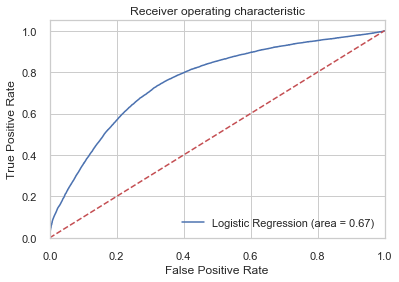

In [19]:
# ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC_graph')
plt.show()

## Random Forest

In [20]:
# Temp Dataset for Random Forest.  Dropped the highly correlated features.  Replace NaN with mean of column
#rf_df = df.drop(['x41', 'x6'], axis=1)
#rf_df = rf_df.fillna(lr_df.mean())

rf_df = lr_df

# One-hot encode the data using pandas get_dummies
#features = pd.get_dummies(rf_df)

# Display the first 5 rows of the last 12 columns
#features.iloc[:,5:].head(5)

In [21]:
# Feature of Importance
# ref: https://towardsdatascience.com/running-random-forests-inspect-the-feature-importances-with-this-code-2b00dd72b92e

y = lr_df['y']
X = lr_df.drop('y', axis = 1)

# Splitting data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

## Import the random forest model.
from sklearn.ensemble import RandomForestClassifier 

## Initiating Random Forest Classifier. 
rf = RandomForestClassifier() 

## Fitting model on training data.
rf.fit(X_train, y_train) 

## Accuracy Score
rf.score(X_test, y_test)


0.8830833333333333

In [22]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)

       importance
x23      0.069371
x48      0.066260
x49      0.064659
x20      0.062553
x42      0.053552
x38      0.052573
x37      0.049939
x40      0.049444
x12      0.048297
x28      0.045893
x7       0.045875
x27      0.044219
x2       0.043891
x46      0.041321
x18      0.009043
x31      0.009025
x11      0.008988
x14      0.008903
x25      0.008829
x5       0.008817
x43      0.008805
x3       0.008784
x44      0.008751
x33      0.008724
x0       0.008714
x9       0.008677
x10      0.008663
x26      0.008629
x39      0.008602
x47      0.008595
x16      0.008586
x36      0.008562
x22      0.008531
x1       0.008529
x15      0.008475
x8       0.008451
x45      0.008427
x35      0.008407
x34      0.008394
x19      0.008390
x13      0.008388
x17      0.008362
x21      0.008200
x4       0.008198
month    0.003704


## Decision Tree

In [23]:
dt = DecisionTreeClassifier(random_state=123)
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

In [24]:
y_pred = dt.predict(X_test)
print ("Accuracy is ", accuracy_score(y_test,y_pred)*100, 'with Gini Index.')

Accuracy is  83.75416666666666 with Gini Index.


In [25]:
dt_ent = DecisionTreeClassifier(criterion='entropy',random_state=123)
dt_ent.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

In [26]:
y_pred = dt_ent.predict(X_test)
print ("Accuracy is ", accuracy_score(y_test,y_pred)*100, 'with Information Gain.')

Accuracy is  84.09791666666668 with Information Gain.


## Decision Tree, Logistic Regressions, and Random Forest using Features of Importance
Summary: Decision Tree yields the best accuracy at 86.85% using max_depth of 15 and entropy.  Logistic Regression showed tiny improvement from 70.27% to 70.33%.  Recommendation is to go with Decision Tree.

In [27]:
# Subsetting by feature of importance from RF
#rf_df_1 = lr_df [['x23', 'x12', 'x20', 'x48', 'x49', 'x27', 'x28','x37', 'x38', 'x42', 'x2', 'x7' ,'x46', 'x40', 'y']]

# importance > .04
rf_df_1 = lr_df [['x23', 'x20', 'x48', 'x49', 'x38', 'x12', 'x42', 'x27','x40', 'x37','x28','x7','x2', 'x46', 'y']]

#rf_df_1 = lr_df [['x23', 'x20', 'x48', 'x49', 'x38', 'y']] - this set yielded a worse accuracy. importance > 0.05
print(rf_df_1.head())
print(rf_df_1.shape)

         x23       x20       x48        x49        x38        x12       x42  \
0   3.553013 -1.909114  0.151589  -8.040166  -1.353729  25.665413  5.414063   
1  10.590601 -5.809984 -0.320283  16.719974  32.816804 -25.014934  4.490915   
2  -5.270615  1.700321 -2.090804  -7.869421  -0.333199  12.078602  9.088864   
3 -11.484431  1.923670  1.806070  -7.670847  14.188669  10.995330 -7.467775   
4 -15.998166 -9.026317 -0.894942  15.724742 -12.578926 -28.106348 -5.229937   

        x27        x40      x37        x28         x7         x2        x46  y  
0  1.005131 -10.612200  1313.96 -18.473784 -14.789997   4.621113  60.781427  0  
1  0.751086   2.147427  1962.78   3.749377  -6.725709  27.839856  15.805696  0  
2  4.171088  -0.863137   430.47  11.522448  11.060572  12.251561  30.856417  0  
3  9.215569  12.084421 -2366.29  30.595226 -18.913592 -24.149632 -72.424569  0  
4  1.811182  30.004727  -620.66  -4.094084  27.532281 -11.352593 -14.085435  1  
(160000, 15)


### Decision Tree w/ Feature of Importance

In [28]:
#y_1 = rf_df_1['y']
#X_1 = rf_df_1.drop('y', axis = 1)

#rf_df_sample = rf_df.sample(frac=.95)

y_1 = rf_df_1['y']
X_1 = rf_df_1.drop('y', axis = 1)

# Model Fitting
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_1, y_1, test_size=0.3, random_state=123)

In [29]:
dt = DecisionTreeClassifier(random_state=123)
dt.fit(X_train1, y_train1)
y_pred1 = dt.predict(X_test1)
print ("Accuracy is ", accuracy_score(y_test1,y_pred1)*100, 'with Gini Index.')

Accuracy is  85.87708333333333 with Gini Index.


In [30]:
dt_ent = DecisionTreeClassifier(criterion='entropy',random_state=123)
dt_ent.fit(X_train1, y_train1)
y_pred1 = dt_ent.predict(X_test1)
print ("Accuracy is ", accuracy_score(y_test1,y_pred1)*100, 'with Information Gain.')

Accuracy is  86.03541666666666 with Information Gain.


In [31]:
n_est = [5, 10, 11,12,13,14,15, 16, 17,18,19, 20, 22, 25, 50, 100]
for n in n_est :
    dt = DecisionTreeClassifier(random_state=123, max_depth = n)
    dt.fit(X_train1, y_train1)
    y_pred1 = dt.predict(X_test1)
    print ("Accuracy is ", accuracy_score(y_test1,y_pred1)*100, 'with Gini Index at', n, 'depth')

Accuracy is  76.93541666666667 with Gini Index at 5 depth
Accuracy is  84.64791666666667 with Gini Index at 10 depth
Accuracy is  85.25416666666666 with Gini Index at 11 depth
Accuracy is  86.15416666666667 with Gini Index at 12 depth
Accuracy is  86.34791666666666 with Gini Index at 13 depth
Accuracy is  86.65625 with Gini Index at 14 depth
Accuracy is  86.85208333333333 with Gini Index at 15 depth
Accuracy is  86.55000000000001 with Gini Index at 16 depth
Accuracy is  86.69583333333334 with Gini Index at 17 depth
Accuracy is  86.63125000000001 with Gini Index at 18 depth
Accuracy is  86.47083333333333 with Gini Index at 19 depth
Accuracy is  86.41041666666666 with Gini Index at 20 depth
Accuracy is  86.21041666666667 with Gini Index at 22 depth
Accuracy is  85.95208333333333 with Gini Index at 25 depth
Accuracy is  85.87708333333333 with Gini Index at 50 depth
Accuracy is  85.87708333333333 with Gini Index at 100 depth


In [32]:
n_est = [5, 10, 11,12,13,14,15, 16, 17,18,19, 20, 22, 25, 50, 100]
for n in n_est :
    dt = DecisionTreeClassifier(criterion = 'entropy',random_state=123, max_depth = n)
    dt.fit(X_train1, y_train1)
    y_pred1 = dt.predict(X_test1)
    print ("Accuracy is ", accuracy_score(y_test1,y_pred1)*100, 'with Information Gain at', n, 'depth')

Accuracy is  76.02499999999999 with Information Gain at 5 depth
Accuracy is  83.61041666666667 with Information Gain at 10 depth
Accuracy is  84.32916666666667 with Information Gain at 11 depth
Accuracy is  85.00208333333333 with Information Gain at 12 depth
Accuracy is  85.55416666666666 with Information Gain at 13 depth
Accuracy is  85.77291666666666 with Information Gain at 14 depth
Accuracy is  86.38958333333333 with Information Gain at 15 depth
Accuracy is  86.33541666666666 with Information Gain at 16 depth
Accuracy is  86.3 with Information Gain at 17 depth
Accuracy is  86.22916666666667 with Information Gain at 18 depth
Accuracy is  86.25625 with Information Gain at 19 depth
Accuracy is  86.12291666666667 with Information Gain at 20 depth
Accuracy is  86.17291666666667 with Information Gain at 22 depth
Accuracy is  85.99166666666666 with Information Gain at 25 depth
Accuracy is  86.03541666666666 with Information Gain at 50 depth
Accuracy is  86.03541666666666 with Information 

### Logistic Regression w/ Feature of Importance

In [33]:
logreg = LogisticRegression(random_state=123)
logreg.fit(X_train1, y_train1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=123, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
y_pred1 = logreg.predict(X_test1)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test1, y_test1)*100), '%')

Accuracy of logistic regression classifier on test set: 70.33 %


In [35]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test1, y_pred1)
print(confusion_matrix)

[[23838  4998]
 [ 9243  9921]]


In [36]:
# Compute Precision, recall, F-Measure and Support
from sklearn.metrics import classification_report
print(classification_report(y_test1, y_pred1))

              precision    recall  f1-score   support

           0       0.72      0.83      0.77     28836
           1       0.66      0.52      0.58     19164

    accuracy                           0.70     48000
   macro avg       0.69      0.67      0.68     48000
weighted avg       0.70      0.70      0.70     48000



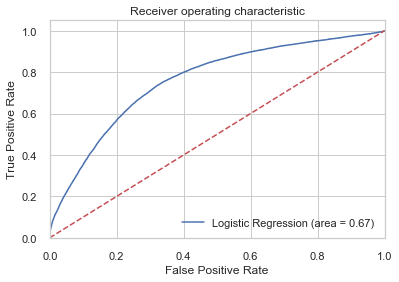

In [37]:
# ROC Curve
logit_roc_auc = roc_auc_score(y_test1, logreg.predict(X_test1))
fpr, tpr, thresholds = roc_curve(y_test1, logreg.predict_proba(X_test1)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC_graph_FI')
plt.show()

### Random Forest w/ Feature Selection

In [38]:
## Import the random forest model.
from sklearn.ensemble import RandomForestClassifier 

## Initiating Random Forest Classifier. 
rf = RandomForestClassifier() 

## Fitting model on training data.
rf.fit(X_train1, y_train1) 

## Accuracy Score
rf.score(X_test1, y_test1)


0.9120208333333333

## Principal Component Analysis (PCA)

In [39]:
df_PCA = lr_df

#variables to be drop
#categoricals ('continent', 'day', 'month')
#highly correlated ('x6', 'x41')
#derived ('Total')
#target ('y')
r_variables = ['month', 'y']

target = df_PCA['y']
#drop variables
explainatory = df_PCA.drop(r_variables, axis=1)

#scale explanatory variables (mean = 0, variance = 1)
scaler = StandardScaler().fit(explainatory)

# Apply transform to variables.
train = scaler.transform(explainatory)

In [40]:
pca = PCA().fit(explainatory)
pca_t = pca.transform(explainatory)

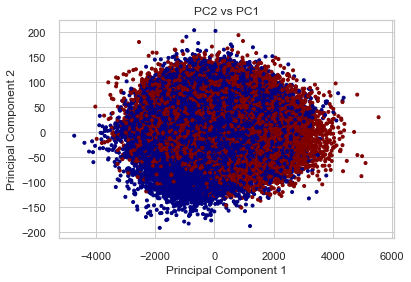

In [41]:
import matplotlib.pyplot as plt

#plot component 1 vs component 2
f = plt.figure()
plt.scatter(pca_t[:, 0], pca_t[:, 1], c=target, marker='.', cmap='jet')
plt.title('PC2 vs PC1')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

f.savefig("scatter.png", bbox_inches='tight')

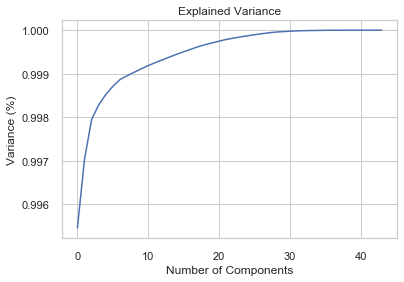

In [42]:
# Source: https://towardsdatascience.com/an-approach-to-choosing-the-number-of-components-in-a-principal-component-analysis-pca-3b9f3d6e73fe

#Plotting the Cumulative Summation of the Explained Variance
f = plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')

f.savefig("variance.png", bbox_inches='tight')

In [43]:
pca_df = pd.DataFrame(pca_t[:,])
pca_df.to_csv("pca_df.csv", sep=',', encoding='utf-8')

## Support Vector Machine (SVM)
#### too computationally expensive to run

In [44]:
#SVM
#Source: https://stackabuse.com/implementing-svm-and-kernel-svm-with-pythons-scikit-learn/

#random.seed(2019)
# split data into training and test set
#train, test, train_target, test_target = train_test_split(pca_df, target, test_size=.2)

In [45]:
#linearly separable data

#svclassifier = SVC(kernel='linear')
#svclassifier.fit(train, train_target)

#y_pred = svclassifier.predict(test)


#print(confusion_matrix(test_target,y_pred))
#print(classification_report(test_target,y_pred))

In [46]:
#non-linearly separable data, gaussian kernel

#svclassifier = SVC(kernel='rbf')
#svclassifier.fit(train, train_target)

#y_pred = svclassifier.predict(test)


#print(confusion_matrix(test_target,y_pred))
#print(classification_report(test_target,y_pred))

In [47]:
#non-linearly separable data, sigmoid kernel

#svclassifier = SVC(kernel='sigmoid')
#svclassifier.fit(train, train_target)

#y_pred = svclassifier.predict(test)


#print(confusion_matrix(test_target,y_pred))
#print(classification_report(test_target,y_pred))

In [48]:
#non-linearly separable data, polynomial kernel

#for degree in range(2,6):
#    svclassifier = SVC(kernel='poly', degree=degree)
#    svclassifier.fit(train, train_target)

#    y_pred = svclassifier.predict(test)

#    print(degree)
#    print(confusion_matrix(test_target,y_pred))
#    print(classification_report(test_target,y_pred))

## kNN - full dataset (minus EDA findings) - k=5

In [49]:
knn_df=df.drop(['x41', 'x6', 'month', 'continent', 'day','x32'], axis=1)

# Fill in NA with mean - LR needs values in each cell 
#knn_df = knn_df.fillna(df.mean())

# Alternative - Drop all rows with NA
knn_df = knn_df.dropna()

#Create x and y

y = knn_df['y']
x = knn_df.drop('y', axis = 1)

In [50]:
#TrainTestSplit

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=123)

In [51]:
#feature scaling

scaler=StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [52]:
#Training and Predictions
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [53]:
y_pred=classifier.predict(x_test)

In [54]:
#Evaluating Results
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7981880859292891


TypeError: 'numpy.ndarray' object is not callable

### Accuracy = 79.39%

## kNN Loop k=1-25 to find the best K value - using subset of data from Random Forest features

In [ ]:
#Subset by RF important features >.04
knn_importance_df = knn_df[['x23', 'x20', 'x48', 'x49', 'x38', 'x12', 'x42', 'x27','x40', 'x37','x28','x7','x2', 'x46', 'y']]

In [ ]:
#Create x and y

y = knn_importance_df['y']
x = knn_importance_df.drop('y', axis = 1)

In [ ]:
#TrainTestSplit

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1234)

In [ ]:
#feature scaling

scaler=StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [ ]:
#source: https://www.ritchieng.com/machine-learning-k-nearest-neighbors-knn/
# try K=1 through K=25 and record testing accuracy
k_range = range(1, 26)

# We can create Python dictionary using [] or dict()
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

print(scores)

In [ ]:
#Visualize it 
# Source: https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/

plt.figure(figsize=(12, 6))
plt.plot(range(1, 26), scores, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy By K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.savefig('KNN_Accuracy.png')

### Best accuracy - k=9

## kNN - k=9 on subset of data

In [ ]:
#Create x and y

y = knn_importance_df['y']
x = knn_importance_df.drop('y', axis = 1)

In [ ]:
#TrainTestSplit

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1234)

In [ ]:
#feature scaling

scaler=StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [ ]:
#Training and Predictions
classifier = KNeighborsClassifier(n_neighbors=9)
classifier.fit(x_train, y_train)

In [ ]:
y_pred=classifier.predict(x_test)

In [ ]:
#Evaluating Results
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
binary = np.array([[18394, 714],
                   [831, 12061]])

class_names = ['y=0', 'y=1']
fig, ax = plot_confusion_matrix(conf_mat=binary,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True,
                               class_names=class_names,
                               figsize=(8,8))
plt.title('KNN Confusion Matrix')
plt.savefig('KNN_Matrix.png')
plt.show()

### Accuracy = 95.17%

## kNN with top 8 features from PCA

In [ ]:
# Read in CSV
df = pd.read_csv("pca_df.csv")
print(len(df))

In [ ]:
PCAdf=df[['0', '1', '2', '3', '4', '5', '6', '7', '8', 'y']]
PCAdf.head()

In [ ]:
#Create x and y

y = PCAdf['y']
x = PCAdf.drop('y', axis = 1)

In [ ]:
#TrainTestSplit

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1234)

In [ ]:
#feature scaling

scaler=StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [ ]:
#Training and Predictions
classifier = KNeighborsClassifier(n_neighbors=9)
classifier.fit(x_train, y_train)

In [ ]:
y_pred=classifier.predict(x_test)

In [ ]:
#Evaluating Results
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

### Accuracy = 85.01

## XGBoost
#### too computationally expensive to run within the final report

In [ ]:
#import os
#os.environ['KMP_DUPLICATE_LIB_OK']='True'
#from xgboost import XGBClassifier

In [ ]:
#y_xg = knn_importance_df['y']
#x_xg = knn_importance_df.drop('y', axis = 1)

In [ ]:
#TrainTestSplit

#X_train, X_test, y_train, y_test = train_test_split(x_xg, y_xg, test_size=0.2, random_state=1234)

In [ ]:
# fit model no training data
#model = XGBClassifier()
#model.fit(X_train, y_train)

In [ ]:
#print(model)

In [ ]:
# make predictions for test data
#y_pred = model.predict(X_test)
#predictions = [round(value) for value in y_pred]

In [ ]:
# evaluate predictions
#accuracy = accuracy_score(y_test, predictions)
#print("Accuracy: %.2f%%" % (accuracy * 100.0))